In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_lego.colors as colors
import mpl_lego.style as style
from mpl_lego.ellipse import plot_cov_ellipse

import neuropacks as packs
from noise_correlations.utils import angle2R

%matplotlib inline

In [2]:
style.use_latex_style()
ccycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [17]:
mu_scatter_size = 80
ax_label_size = 18

# RET2 path
data_path = '/storage/data_from_mathew/200114_fov1_data.mat'
# Create neuropack
pack = packs.RET2(data_path=data_path)
X_ret2 = pack.get_response_matrix(cells='tuned', response='max')
# Extract stimuli
stimuli_ret2 = pack.angles
unique_stimuli_ret2 = pack.unique_angles
stim1 = 0
stim2 = 60
neuron1 = 32
neuron2 = 25
X1 = X_ret2[stimuli_ret2 == stim1][:, [neuron1, neuron2]]
mu1 = np.mean(X1, axis=0)
X2 = X_ret2[stimuli_ret2 == stim2][:, [neuron1, neuron2]]
mu2 = np.mean(X2, axis=0)

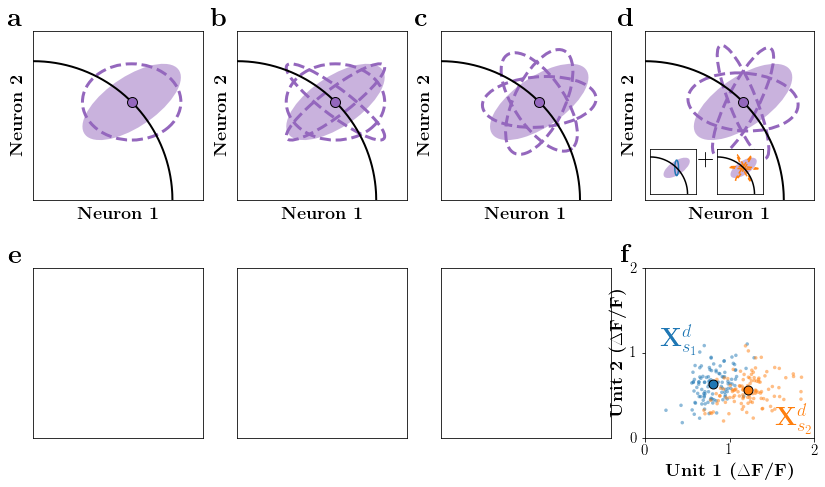

In [28]:
fig_x = 14
fig_y = 8
fig, axes = plt.subplots(2, 4, figsize=(fig_x, fig_y))

n1 = np.linspace(0, 1, 1000)
n2 = np.sqrt(1 - n1**2)
center = 1 / np.sqrt([2, 2])
base = np.array([[0.50, 0.25],
                 [0.25, 0.30]])
dash_lw = 3

    
# Plot shuffle null model
shuffleax = axes[0, 0]
shuffle = np.diag(np.diag(base))
plot_cov_ellipse(shuffle,
                 mu=center,
                 ax=shuffleax,
                 facecolor=colors.hex_to_rgb(ccycle[4], 0.0),
                 edgecolor=colors.hex_to_rgb(ccycle[4], 1.0),
                 n_std=0.5,
                 linewidth=dash_lw,
                 linestyle='--',
                 include_mu=False)

# Plot ucorr null model
shuffleax = axes[0, 1]
sigma = np.sqrt(np.diag(base))
corrs = [-.9, 0, .9]
for c in corrs:
    mat = np.eye(2)
    mat[0, 1] = c
    mat[1, 0] = c
    ucorr = mat * np.outer(sigma, sigma)
    plot_cov_ellipse(ucorr,
                     mu=center,
                     ax=shuffleax,
                     facecolor=colors.hex_to_rgb(ccycle[4], 0.0),
                     edgecolor=colors.hex_to_rgb(ccycle[4], 1.0),
                     n_std=0.5,
                     linewidth=dash_lw,
                     linestyle='--',
                     include_mu=False)

# Plot rotation null model
rotax = axes[0, 2]
angle1 = 30
angle2 = -30
angle3 = 90
R1 = angle2R(angle1)
R2 = angle2R(angle2)
R3 = angle2R(angle3)

rot1 = R1 @ base @ R1.T
rot2 = R2 @ base @ R2.T
rot3 = R3 @ base @ R3.T
# Plot three rotations
for rot in [rot1, rot2, rot3]:
    plot_cov_ellipse(rot,
                     mu=center,
                     ax=rotax,
                     facecolor=colors.hex_to_rgb(ccycle[4], 0.0),
                     edgecolor=colors.hex_to_rgb(ccycle[4], 1.0),
                     n_std=0.5,
                     linewidth=dash_lw,
                     linestyle='--',
                     include_mu=False)

# Plot factor analysis null model
faax = axes[0, 3]
v = np.array([0.70, (0.25 / 0.70)])
shared = np.outer(v, v)
private = base - shared

# Rotate the latent shared variability
rot1 = private + R1 @ shared @ R1.T
rot2 = private + R2 @ shared @ R2.T
rot3 = private + R3 @ shared @ R3.T

# Plot three rotations
for rot in [rot1, rot2, rot3]:
    plot_cov_ellipse(rot,
                     mu=center,
                     ax=faax,
                     facecolor=colors.hex_to_rgb(ccycle[4], 0.0),
                     edgecolor=colors.hex_to_rgb(ccycle[4], 1.0),
                     n_std=0.5,
                     linewidth=dash_lw,
                     linestyle='--',
                     include_mu=False)

start_x = faax.get_position().xmin + (.01 * fig_y / fig_x)
start_y = faax.get_position().ymin + .035
size = .63
dx = .3
inset0 = fig.add_axes([start_x, start_y, size / fig_x, size / fig_y])
inset1 = fig.add_axes([start_x + (size + dx) / fig_x, start_y, size / fig_x, size / fig_y])
fig.text(start_x + (2*size + dx) / fig_x / 2, start_y + size / fig_y / 2. + .02,
         '+', size=24, va='center', ha='center')
plot_cov_ellipse(base,
                 mu=center,
                 ax=inset0,
                 facecolor=colors.hex_to_rgb(ccycle[4], 0.5),
                 n_std=0.5,
                 include_mu=False)
plot_cov_ellipse(base,
                 mu=center,# + np.array([dx, 0]),
                 ax=inset1,
                 facecolor=colors.hex_to_rgb(ccycle[4], 0.5),
                 n_std=0.5,
                 include_mu=False)
# Rotate the latent shared variability
rot1 = np.diag(0.003 * np.ones(2)) + R1 @ shared @ R1.T
rot2 = np.diag(0.003 * np.ones(2)) + R2 @ shared @ R2.T
rot3 = np.diag(0.003 * np.ones(2)) + R3 @ shared @ R3.T
# Plot three rotations
for rot in [rot1, rot2, rot3]:
    plot_cov_ellipse(rot,
                     mu=center,# + np.array([dx, 0]),
                     ax=inset1,
                     facecolor=colors.hex_to_rgb(ccycle[1], 0.0),
                     edgecolor=colors.hex_to_rgb(ccycle[1], 1.0),
                     n_std=0.5,
                     linewidth=1.5,
                     linestyle='--',
                     include_mu=False)
# Plot private covariance ellipse
plot_cov_ellipse(private,
                 mu=center,
                 ax=inset0,
                 facecolor='None',
                 edgecolor=colors.hex_to_rgb(ccycle[0], 1.0),
                 n_std=0.5,
                 linewidth=1.5,
                 linestyle='-',
                 include_mu=False)
for ax in [inset0, inset1]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([0., 1.22])
    ax.set_ylim([0., 1.22])
    ax.plot(n1, n2,
            color='black',
            linewidth=1.5)
    
ax = axes[1, 3]
ax.scatter(
    X1[:, 0],
    X1[:, 1],
    marker='.',
    s=50,
    color='C0',
    edgecolor='none',
    alpha=0.50)
ax.scatter(
    X2[:, 0],
    X2[:, 1],
    marker='.',
    s=50,
    color='C1',
    edgecolor='none',
    alpha=0.50)
ax.scatter(
    mu1[0], mu1[1],
    color='C0',
    s=mu_scatter_size,
    edgecolor='black')
ax.scatter(
    mu2[0], mu2[1],
    color='C1',
    s=mu_scatter_size,
    edgecolor='black')

ax.text(
    x=0.4, y=1.15, s=r'$\mathbf{X}_{s_1}^d$',
    va='center',
    ha='center',
    color='C0',
    size=26)
ax.text(
    x=1.75, y=0.23, s=r'$\mathbf{X}_{s_2}^d$',
    va='center',
    ha='center',
    color='C1',
    size=26)

ax.set_xlim([0., 2])
ax.set_ylim(ax.get_xlim())
ax.set_xticks([0, 1, 2])
ax.set_yticks(ax.get_xticks())
ax.set_xlabel(r'\textbf{Unit 1 ($\Delta$F/F)}', fontsize=ax_label_size)
ax.set_ylabel(r'\textbf{Unit 2 ($\Delta$F/F)}', fontsize=ax_label_size)
ax.tick_params(labelsize=15)
ax.set_aspect('equal')




for ax in axes.ravel()[:-1]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    
for ax in axes[0]:
    ax.plot(n1, n2,
        color='black',
        linewidth=2)
    ax.set_xlim([0, 1.22])
    ax.set_ylim([0, 1.22])
        
    # Axes labels
    ax.set_xlabel(r'\textbf{Neuron 1}',
                  fontsize=ax_label_size,
                  labelpad=7)
    ax.set_ylabel(r'\textbf{Neuron 2}',
              fontsize=ax_label_size,
              labelpad=7)
    plot_cov_ellipse(base,
                     mu=center,
                     ax=ax,
                     facecolor=colors.hex_to_rgb(ccycle[4], 0.5),
                     n_std=0.5,
                     include_mu=False)
    ax.scatter(center[0],
               center[1],
               color=ccycle[4],
               edgecolor='black',
               s=100,
               zorder=1000)


for ax, label in zip(axes.ravel(),
                     [r'\textbf{a}', r'\textbf{b}', r'\textbf{c}', r'\textbf{d}',
                      r'\textbf{e}', r'', r'', r'\textbf{f}']):
    ax.text(x=-0.1,
            y=1.07,
            s=label,
            ha='center',
            va='center',
            size=27,
            fontfamily='sans-serif',
            transform=ax.transAxes)

plt.savefig('figure2.pdf', bbox_inches='tight', dpi=300)
plt.savefig('figure2.jpg', bbox_inches='tight', dpi=300)